<a href="https://colab.research.google.com/github/dhanushbabuk/DeepLearning-LAB/blob/main/DL_Lab_3__SVM_Softmax_Classifier_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Softmax, SVM, and k-NN Classifiers
A tech startup, Hackedin Inc., is developing an image classification system for various applications, including e-commerce product recommendation, medical imaging diagnosis, and security surveillance. The company aims to deploy a robust classifier that can accurately classify images into predefined categories, enabling seamless integration into their clients' systems.

**Challenge:**
Imagify Inc. faces the challenge of selecting and implementing a suitable image classification algorithm that can meet the performance requirements of their diverse client base. Additionally, they need to evaluate the effectiveness of different classifiers and determine their applicability in real-world scenarios.

**Solution:**
The company decides to explore three popular classification algorithms: Softmax, Support Vector Machine (SVM), and k-Nearest Neighbors (k-NN) classifiers. They develop a prototype system using Python and the CIFAR-10 dataset to compare the performance of these classifiers.

**Implementation:**
Data Preparation: Imagify Inc. loads the CIFAR-10 dataset, which contains 60,000 32x32 color images across 10 classes, suitable for evaluating classification algorithms.

Classifier Development: The team implements Softmax, SVM, and k-NN classifiers using Python and NumPy. They initialize the classifiers and define functions for training, evaluating accuracy, and making predictions.

Training and Evaluation: Imagify Inc. trains all three classifiers using the training data and evaluates their performance on validation data. They tune hyperparameters such as learning rate, regularization strength, and k value to optimize classifier performance.

Performance Comparison: The company compares the accuracy and computational efficiency of the Softmax, SVM, and k-NN classifiers to assess their effectiveness in image classification tasks.

**Use Cases:**
E-commerce Product Recommendation: Imagify Inc. plans to integrate the trained classifiers into e-commerce platforms to recommend visually similar products based on user preferences and browsing history.

Medical Imaging Diagnosis: The classifiers can assist healthcare professionals in diagnosing medical conditions by analyzing medical images such as X-rays, MRIs, and CT scans, enhancing diagnostic accuracy and efficiency.

Security Surveillance: In security systems, the classifiers can be deployed to detect and classify objects or individuals in surveillance footage, improving security measures in public spaces, airports, and other sensitive areas.


# 1. Importing Libraries and Dataset

In [ ]:
!pip install matplotlib
!pip install keras


In this section, we define a Softmax and SVM classifier class for image classification tasks using the CIFAR-10 dataset. We also load the dataset, display some sample images, preprocess the data, train and evaluate the classifiers, and plot the loss history.

**Softmax and SVM Classifier** Class Definitions We define Softmax and SVM classifier classes to perform image classification tasks. These classifiers are implemented using Python and NumPy, enabling efficient training and prediction.

**Loading CIFAR-10 Dataset** We load the CIFAR-10 dataset, which consists of 60,000 32x32 color images across 10 classes. This dataset serves as the basis for training and evaluating our classifiers.

**Displaying Sample Images from CIFAR-10 Dataset** We display some sample images from the CIFAR-10 dataset to provide visual insights into the data. This step helps us understand the nature of the images and the diversity of classes present in the dataset.

**Preprocessing Data** Before training the classifiers, we preprocess the image data. This includes subtracting the mean value across every dimension from the training, validation, and test sets. Preprocessing ensures that the data is normalized and ready for training.

**Training and Evaluating**Classifiers We train the Softmax and SVM classifiers using the preprocessed data. After training, we evaluate the performance of each classifier on both the training and validation datasets to assess their accuracy and generalization capabilities.

**Plotting Loss History**Finally, we plot the loss history of the classifiers during training. This visualization helps us analyze the convergence behavior of the classifiers and understand how the loss changes over iterations.

<>:217: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:217: SyntaxWarning: "is not" with a literal. Did you mean "!="?


   114688/170498071 [..............................] - ETA: 1:14

<ipython-input-2-ff9f0e8536d7>:217: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if verbose and i % 100 == 0 and len(lossHistory) is not 0:


170498071/170498071 [==============================] - 4s 0us/step


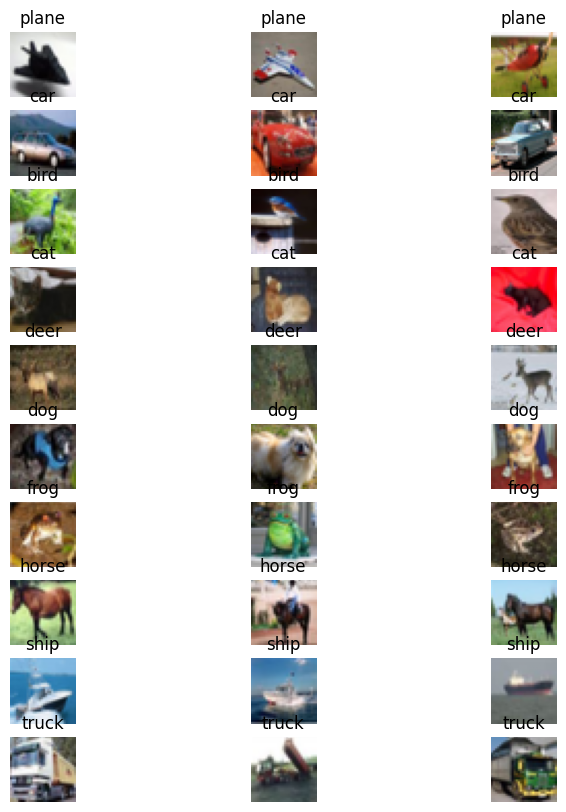

Train image shape:    (49000, 32, 32, 3)
Train label shape:    (49000,)
Validate image shape: (1000, 32, 32, 3)
Validate label shape: (1000,)
Test image shape:     (10000, 32, 32, 3)
Test label shape:     (10000,)


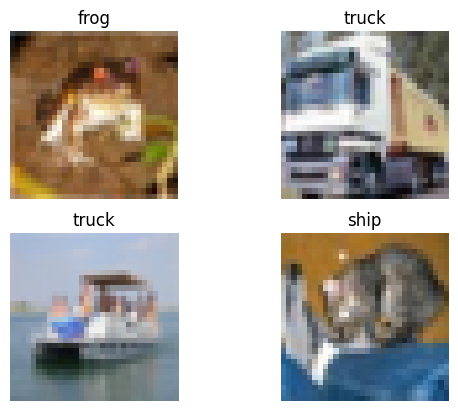

Training data shape:    (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:        (10000, 3072)
Loop 0 loss 60.23035770281492


<ipython-input-2-ff9f0e8536d7>:50: RuntimeWarning: divide by zero encountered in log
  loss_i = -np.log(p_yi)


Loop 100 loss inf
Loop 200 loss inf
Loop 300 loss inf
Loop 400 loss inf
Loop 500 loss inf
Loop 600 loss inf
Loop 700 loss inf
Loop 800 loss inf
Loop 900 loss inf
Loop 0 loss 155.28671299837538
Loop 100 loss 1129.2154938998672
Loop 200 loss 2387.1532942761614
Loop 300 loss 1554.6801289933885
Loop 400 loss 2216.685385247751
Loop 500 loss 2135.7450772779184
Loop 600 loss 1551.224566415479
Loop 700 loss 1692.9417388082386
Loop 800 loss 1293.6967237768604
Loop 900 loss 2006.1656741862744
Softmax classifier:
Train accuracy:  31.738775510204082
Validation accuracy:  31.6
SVM classifier:
Train accuracy:  33.82244897959183
Validation accuracy:  30.5


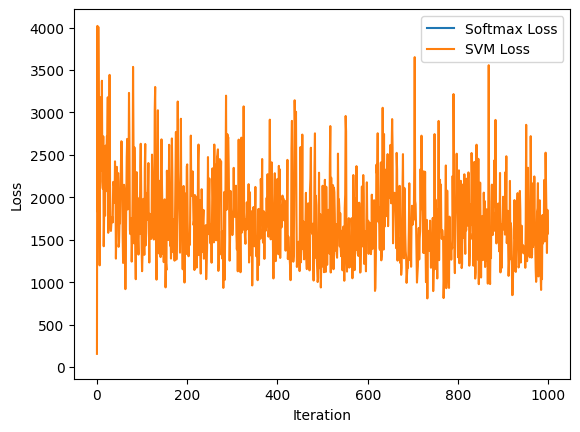

In [ ]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10


class Softmax(object):
    """" Softmax classifier """

    def __init__(self, inputDim, outputDim):
        self.W = None

        sigma = 0.01
        self.W = sigma * np.random.randn(inputDim, outputDim)


    def calLoss(self, x, y, reg):
        """
        Softmax loss function
        D: Input dimension.
        C: Number of Classes.
        N: Number of example.

        Inputs:
        - x: A numpy array of shape (batchSize, D).
        - y: A numpy array of shape (N,) where value < C.
        - reg: (float) regularization strength.

        Returns a tuple of:
        - loss as single float.
        - gradient with respect to weights self.W (dW) with the same shape of self.W.
        """
        loss = 0.0
        dW = np.zeros_like(self.W)

        # Calculating loss for softmax
        # calculate the score matrix
        N = x.shape[0]
        s = x.dot(self.W)
        # calculating s-max(s)
        s_ = s - np.max(s, axis=1, keepdims=True)
        exp_s_ = np.exp(s_)
        # calculating base
        sum_f = np.sum(exp_s_, axis=1, keepdims=True)
        # calculating probability of incorrect label by dividing by base
        p = exp_s_ / sum_f
        p_yi = p[np.arange(N), y]
        # Calculating loss by applying log over the probability
        loss_i = -np.log(p_yi)
        # keep as column vector
        # TODO: add regularization
        loss = np.sum(loss_i) / N
        loss += reg * np.sum(self.W * self.W)
        ds = p.copy()
        ds[np.arange(x.shape[0]), y] += -1
        dW = (x.T).dot(ds) / N
        dW = dW + (2 * reg * self.W)


        return loss, dW

    def train(self, x, y, lr=1e-3, reg=1e-5, iter=100, batchSize=200, verbose=False):
        """
        Train this Softmax classifier using stochastic gradient descent.
        D: Input dimension.
        C: Number of Classes.
        N: Number of example.

        Inputs:
        - x: training data of shape (N, D)
        - y: output data of shape (N, ) where value < C
        - lr: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - iter: (integer) total number of iterations.
        - batchSize: (integer) number of example in each batch running.
        - verbose: (boolean) Print log of loss and training accuracy.

        Outputs:
        A list containing the value of the loss function at each training iteration.
        """

        # Run stochastic gradient descent to optimize W.
        lossHistory = []
        for i in range(iter):
            xBatch = None
            yBatch = None

            num_train = np.random.choice(x.shape[0], batchSize)
            xBatch = x[num_train]
            yBatch = y[num_train]
            loss, dW = self.calLoss(xBatch, yBatch, reg)
            self.W = self.W - lr * dW
            lossHistory.append(loss)

            # Print loss for every 100 iterations
            if verbose and i % 100 == 0 and len(lossHistory) != 0:
                print('Loop {0} loss {1}'.format(i, lossHistory[i]))

        return lossHistory

    def predict(self, x, ):
        """
        Predict the y output.

        Inputs:
        - x: training data of shape (N, D)

        Returns:
        - yPred: output data of shape (N, ) where value < C
        """
        yPred = np.zeros(x.shape[0])

        s = x.dot(self.W)
        yPred = np.argmax(s, axis=1)

        return yPred

    def calAccuracy(self, x, y):
        acc = 0

        yPred = self.predict(x)
        acc = np.mean(y == yPred) * 100

        return acc


class Svm(object):
    """" Svm classifier """

    def __init__(self, inputDim, outputDim):
        self.W = None

        sigma = 0.01
        self.W = sigma * np.random.randn(inputDim, outputDim)


    def calLoss(self, x, y, reg):
        """
        Svm loss function
        D: Input dimension.
        C: Number of Classes.
        N: Number of example.

        Inputs:
        - x: A numpy array of shape (batchSize, D).
        - y: A numpy array of shape (N,) where value < C.
        - reg: (float) regularization strength.

        Returns a tuple of:
        - loss as single float.
        - gradient with respect to weights self.W (dW) with the same shape of self.W.
        """
        loss = 0.0
        dW = np.zeros_like(self.W)

        # Calculating score matrix
        s = x.dot(self.W)
        # Score with yi
        s_yi = s[np.arange(x.shape[0]), y]
        # finding the delta
        delta = s - s_yi[:, np.newaxis] + 1
        # loss for samples
        loss_i = np.maximum(0, delta)
        loss_i[np.arange(x.shape[0]), y] = 0
        loss = np.sum(loss_i) / x.shape[0]
        # Loss with regularization
        loss += reg * np.sum(self.W * self.W)
        # Calculating ds
        ds = np.zeros_like(delta)
        ds[delta > 0] = 1
        ds[np.arange(x.shape[0]), y] = 0
        ds[np.arange(x.shape[0]), y] = -np.sum(ds, axis=1)

        dW = (1 / x.shape[0]) * (x.T).dot(ds)
        dW = dW + (2 * reg * self.W)


        return loss, dW

    def train(self, x, y, lr=1e-3, reg=1e-5, iter=100, batchSize=200, verbose=False):
        """
        Train this Svm classifier using stochastic gradient descent.
        D: Input dimension.
        C: Number of Classes.
        N: Number of example.

        Inputs:
        - x: training data of shape (N, D)
        - y: output data of shape (N, ) where value < C
        - lr: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - iter: (integer) total number of iterations.
        - batchSize: (integer) number of example in each batch running.
        - verbose: (boolean) Print log of loss and training accuracy.

        Outputs:
        A list containing the value of the loss at each training iteration.
        """

        # Run stochastic gradient descent to optimize W.
        lossHistory = []
        for i in range(iter):
            xBatch = None
            yBatch = None

            # creating batch
            num_train = np.random.choice(x.shape[0], batchSize)
            xBatch = x[num_train]
            yBatch = y[num_train]
            loss, dW = self.calLoss(xBatch, yBatch, reg)
            self.W = self.W - lr * dW
            lossHistory.append(loss)


            # Print loss for every 100 iterations
            if verbose and i % 100 == 0 and len(lossHistory) is not 0:
                print('Loop {0} loss {1}'.format(i, lossHistory[i]))

        return lossHistory

    def predict(self, x, ):
        """
        Predict the y output.

        Inputs:
        - x: training data of shape (N, D)

        Returns:
        - yPred: output data of shape (N, ) where value < C
        """
        yPred = np.zeros(x.shape[0])

        # TODO: 5 points                                                          #
        # -  Store the predict output in yPred                                    #

        s = x.dot(self.W)
        yPred = np.argmax(s, axis=1)

        return yPred

    def calAccuracy(self, x, y):
        acc = 0

        # TODO: 5 points                                                          #
        # -  Calculate accuracy of the predict value and store to acc variable    #

        yPred = self.predict(x)
        acc = np.mean(y == yPred) * 100

        return acc


# Load the CIFAR10 dataset
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(float)



# Display some images for each class
plt.figure(figsize=(15, 10))
for i, cls in enumerate(classesName):
    class_indices = np.where(yTrain == i)[0][:3]  # Get the first 5 indices of the current class
    for j, idx in enumerate(class_indices):
        plt.subplot(10, 5, i * 5 + j + 1)
        plt.imshow(xTrain[idx] / 255)
        plt.axis('off')
        plt.title(cls)
plt.show()



# Show dimension for each variable
print('Train image shape:    {0}'.format(xTrain.shape))
print('Train label shape:    {0}'.format(yTrain.shape))
print('Validate image shape: {0}'.format(xVal.shape))
print('Validate label shape: {0}'.format(yVal.shape))
print('Test image shape:     {0}'.format(xTest.shape))
print('Test label shape:     {0}'.format(yTest.shape))

# Show some CIFAR10 images
plt.subplot(221)
plt.imshow(xTrain[0] / 255)  # Normalize pixel values to the range [0, 1]
plt.axis('off')
plt.title(classesName[yTrain[0]])
plt.subplot(222)
plt.imshow(xTrain[1] / 255)  # Normalize pixel values to the range [0, 1]
plt.axis('off')
plt.title(classesName[yTrain[1]])
plt.subplot(223)
plt.imshow(xVal[0] / 255)  # Normalize pixel values to the range [0, 1]
plt.axis('off')
plt.title(classesName[yVal[1]])
plt.subplot(224)
plt.imshow(xTest[0] / 255)  # Normalize pixel values to the range [0, 1]
plt.axis('off')
plt.title(classesName[yTest[1]])
plt.show()


# Preprocessing: subtract the mean value across every dimension for training data
meanImage = np.mean(xTrain, axis=0)
xTrain -= meanImage
xVal -= meanImage
xTest -= meanImage

# Reshape the image data into rows
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1))
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))

print('Training data shape:   ', xTrain.shape)
print('Validation data shape: ', xVal.shape)
print('Test data shape:       ', xTest.shape)

# Hyperparameters
inputDim = xTrain.shape[1]
outputDim = 10  # number of classes
learningRate = 1e-3
regStrength = 1e-5
numIterations = 1000
batchSize = 200

# Create Softmax and SVM classifiers
softmaxClassifier = Softmax(inputDim, outputDim)
svmClassifier = Svm(inputDim, outputDim)

# Train Softmax classifier
softmaxLossHistory = softmaxClassifier.train(xTrain, yTrain, lr=learningRate, reg=regStrength, iter=numIterations,
                                             batchSize=batchSize, verbose=True)

# Train SVM classifier
svmLossHistory = svmClassifier.train(xTrain, yTrain, lr=learningRate, reg=regStrength, iter=numIterations,
                                     batchSize=batchSize, verbose=True)

# Evaluate the classifiers
softmaxTrainAccuracy = softmaxClassifier.calAccuracy(xTrain, yTrain)
softmaxValAccuracy = softmaxClassifier.calAccuracy(xVal, yVal)
print('Softmax classifier:')
print('Train accuracy: ', softmaxTrainAccuracy)
print('Validation accuracy: ', softmaxValAccuracy)

svmTrainAccuracy = svmClassifier.calAccuracy(xTrain, yTrain)
svmValAccuracy = svmClassifier.calAccuracy(xVal, yVal)
print('SVM classifier:')
print('Train accuracy: ', svmTrainAccuracy)
print('Validation accuracy: ', svmValAccuracy)

# Plot the loss history
plt.plot(softmaxLossHistory, label='Softmax Loss')
plt.plot(svmLossHistory, label='SVM Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()


**KNN Classifier Integration** We integrate the KNN classifier into our analysis pipeline. KNN is a simple yet powerful non-parametric algorithm used for classification tasks. It works by finding the K nearest neighbors of a given data point in the feature space and assigning the most common class among them as the predicted class for the data point.

**Loading CIFAR-10 Dataset** Similar to the previous section, we load the CIFAR-10 dataset, consisting of 60,000 32x32 color images across 10 classes. This dataset serves as the foundation for training and evaluating our classifiers.

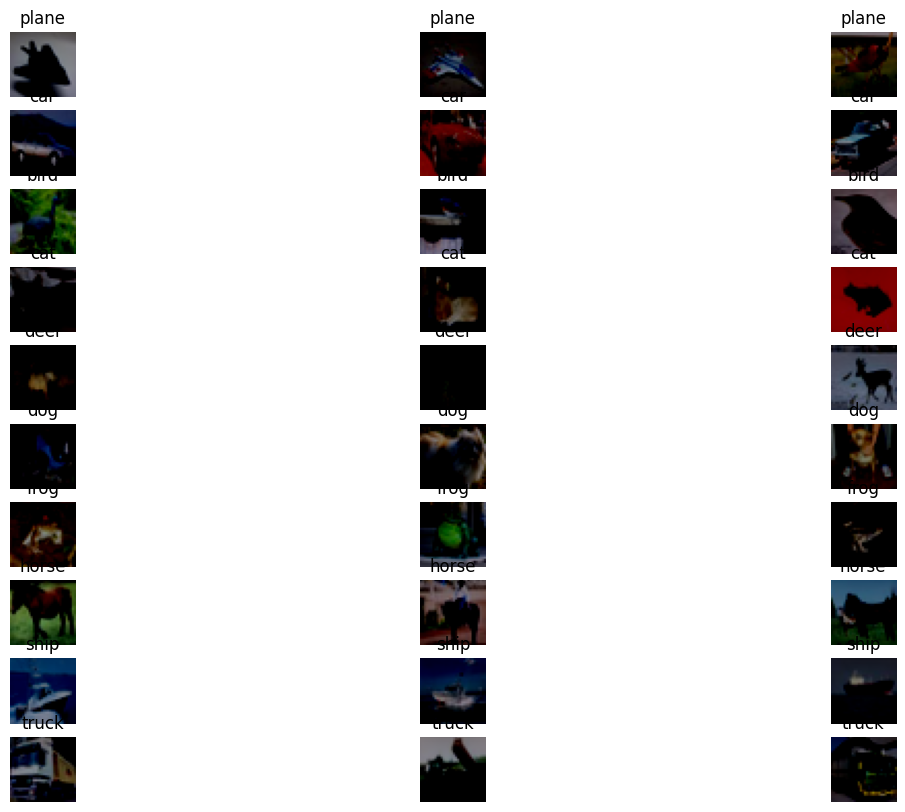

Train image shape:    (49000, 3072)
Train label shape:    (49000,)
Validate image shape: (1000, 3072)
Validate label shape: (1000,)
Test image shape:     (10000, 3072)
Test label shape:     (10000,)
k-Nearest Neighbors (kNN) classifier:
Train accuracy:  0.5041224489795918
Validation accuracy:  0.326


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier

class KNN(object):
    """k-Nearest Neighbors (kNN) classifier"""

    def train(self, x_train, y_train):
        # Train the kNN classifier
        self.classifier = KNeighborsClassifier(n_neighbors=5)
        self.classifier.fit(x_train, y_train)

    def calAccuracy(self, x, y):
        # Calculate accuracy of the kNN classifier
        return self.classifier.score(x, y)

# Load the CIFAR10 dataset
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(float)

# Preprocessing: subtract the mean value across every dimension for training data
meanImage = np.mean(xTrain, axis=0)
xTrain -= meanImage
xVal -= meanImage
xTest -= meanImage

# Reshape the image data into rows
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1))
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))

# Display some images for each class
plt.figure(figsize=(15, 10))
for i, cls in enumerate(classesName):
    class_indices = np.where(yTrain == i)[0][:3]  # Get the first 3 indices of the current class
    for j, idx in enumerate(class_indices):
        plt.subplot(10, 3, i * 3 + j + 1)
        plt.imshow(xTrain[idx].reshape(32, 32, 3) / 255)
        plt.axis('off')
        plt.title(cls)
plt.show()

# Show dimension for each variable
print('Train image shape:    {0}'.format(xTrain.shape))
print('Train label shape:    {0}'.format(yTrain.shape))
print('Validate image shape: {0}'.format(xVal.shape))
print('Validate label shape: {0}'.format(yVal.shape))
print('Test image shape:     {0}'.format(xTest.shape))
print('Test label shape:     {0}'.format(yTest.shape))

# Define input and output dimensions based on the shape of the dataset
inputDim = xTrain.shape[1]
outputDim = 10  # Since there are 10 classes in CIFAR-10 dataset

# Create a kNN classifier
knnClassifier = KNN()

# Train kNN classifier
knnClassifier.train(xTrain, yTrain)

# Evaluate the kNN classifier
knnTrainAccuracy = knnClassifier.calAccuracy(xTrain, yTrain)
knnValAccuracy = knnClassifier.calAccuracy(xVal, yVal)
print('k-Nearest Neighbors (kNN) classifier:')
print('Train accuracy: ', knnTrainAccuracy)
print('Validation accuracy: ', knnValAccuracy)
